In [1]:
import xlrd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
meses = ['Janeiro-2018','Fevereiro-2018','Janeiro-2019','Fevereiro-2019']

In [3]:
def xlread(arq_xls):    
    """
    Gerador que le arquivo .xls
    """
    # Abre o arquivo
    xls = xlrd.open_workbook(arq_xls)
    # Pega a primeira planilha do arquivo
    plan = xls.sheets()[0]
    # Para i de zero ao numero de linhas da planilha
    for i in range(plan.nrows):
        # Le os valores nas linhas da planilha
        yield plan.row_values(i)


In [4]:
#Variáveis para armazenar os dados
countAposentados = 0
qtdAposentados = []
somaMes = 0
listSomaMes = []

In [5]:
for m in meses:
    for linha in xlread(m+'.xls'):
        #pegando dados de cada mês
        countAposentados += 1
        somaMes += linha[2]       
        
    #Add nas Listas
    qtdAposentados.append(countAposentados)   
    listSomaMes.append(somaMes)
    
    #Zerando variaveis
    countAposentados = 0
    somaMes = 0    

In [6]:
#Variáveis para o Gráfico
xBar1 = range(len(qtdAposentados))
yBar1 = qtdAposentados
xBar2 = range(len(listSomaMes))
yBar2 = listSomaMes
xleg = range(len(meses))

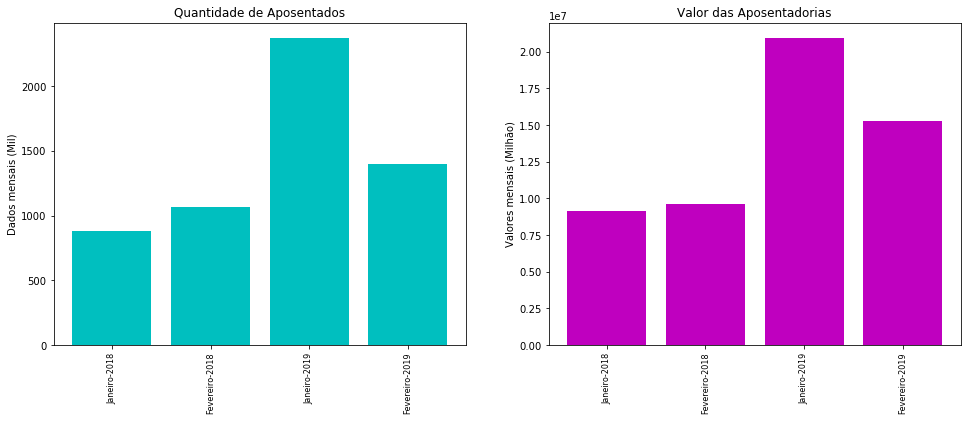

In [7]:
#Plotando gráfico

def qtdAposentados():
    plt.subplot(121).set_title('Quantidade de Aposentados')
    b1=plt.bar(xBar1, yBar1, color='c')
    plt.xticks(xleg,meses,rotation='vertical',size=8)    
    plt.ylabel(u'Dados mensais (Mil)')
    
    
def valorAposentadorias():
    plt.subplot(122).set_title('Valor das Aposentadorias')
    b2=plt.bar(xBar2, yBar2, color='m')
    plt.xticks(xleg,meses,rotation='vertical',size=8)
    plt.ylabel(u'Valores mensais (Milhão)')
    
def Plotar():
    plt.subplots_adjust(top=1.20, bottom=0.08, left=0.4, right=2.5, hspace=0.25,wspace=0.20)   
    qtdAposentados()
    valorAposentadorias()
    plt.show()

Plotar()


In [8]:
cargoValor = {}
mesDados = {}
topDez = {}

In [9]:
# Pegando os 10 maiores valores dos meses analisados

def pegaValores():
    for m in meses:
        cargoValor = {}
        for linha in xlread(m+'.xls'):
            #pegando cargo e valor de cada mês
            cargo = linha[0].strip()
            valor = linha[2]
            cargoValor[cargo] = valor
        mesDados[m] = cargoValor
        
def pegaTopDez():
    for m in meses:
        listaValores = []
        cargoValor = mesDados[m]
        
        # Enumerando os dados pelos valores recebidos
        lista = sorted(cargoValor.values(), key=float, reverse=True) ## Poderia ser enumerado pelos items(), mas não está funcionando
        
        for posicao in range(10):
            listaValores.append(lista[posicao])
        
        topDez[m] = listaValores
        
pegaValores()
pegaTopDez()
            
print(topDez)

{'Janeiro-2018': [54521.12, 43823.26, 43733.16, 35646.34, 35400.44, 33596.68, 30885.22, 28976.19, 27258.31, 26136.41], 'Fevereiro-2018': [34024.46, 32905.42, 27181.95, 25490.18, 22600.43, 22086.33, 21041.6, 20705.63, 19636.96, 19291.83], 'Janeiro-2019': [46324.13, 29403.42, 26868.48, 26562.99, 25565.46, 24892.95, 24807.54, 23837.96, 23516.56, 23212.98], 'Fevereiro-2019': [71315.78, 50210.51, 50058.27, 48252.89, 48122.48, 44684.73, 43608.62, 42550.88, 33441.08, 31135.88]}


In [10]:
# Tabela indivudual para cada mês

for m in meses:
    tabela = pd.DataFrame(
        {
            m: topDez[m]
        }
    )
    print(tabela)
    print('\n')

   Janeiro-2018
0      54521.12
1      43823.26
2      43733.16
3      35646.34
4      35400.44
5      33596.68
6      30885.22
7      28976.19
8      27258.31
9      26136.41


   Fevereiro-2018
0        34024.46
1        32905.42
2        27181.95
3        25490.18
4        22600.43
5        22086.33
6        21041.60
7        20705.63
8        19636.96
9        19291.83


   Janeiro-2019
0      46324.13
1      29403.42
2      26868.48
3      26562.99
4      25565.46
5      24892.95
6      24807.54
7      23837.96
8      23516.56
9      23212.98


   Fevereiro-2019
0        71315.78
1        50210.51
2        50058.27
3        48252.89
4        48122.48
5        44684.73
6        43608.62
7        42550.88
8        33441.08
9        31135.88




In [11]:
# Tabela única com todos os dados

tabela = pd.DataFrame(topDez)

tabela

,Janeiro-2018,Fevereiro-2018,Janeiro-2019,Fevereiro-2019
0,54521.12,34024.46,46324.13,71315.78
1,43823.26,32905.42,29403.42,50210.51
2,43733.16,27181.95,26868.48,50058.27
3,35646.34,25490.18,26562.99,48252.89
4,35400.44,22600.43,25565.46,48122.48
5,33596.68,22086.33,24892.95,44684.73
6,30885.22,21041.60,24807.54,43608.62
7,28976.19,20705.63,23837.96,42550.88
8,27258.31,19636.96,23516.56,33441.08
9,26136.41,19291.83,23212.98,31135.88


In [12]:
## MÉTODOS ESTATÍSTICOS
# Media de uma população ou amostra
def media(pop):
    return pop.mean()

# moda de uma população ou amostra
def moda(pop):
    return pop.mode()

# Mediana de uma população ou amostra
def mediana(pop):
    return pop.median()

# Amplitude de uma população ou amostra
def amplitude(pop):
    return pop.max() - pop.min()

# Variancia de uma população ou amostra
def variancia(pop):
    return pop.var()

# Desvio Padrão de uma população ou amostra
def desvPad(pop):
    return pop.std()

# Desvio Absoluto de uma população ou amostra
def desvAbs(pop):
    return pop.mad()

In [13]:
med = media(tabela['Fevereiro-2019'])
round(med, 2)

46338.11

In [14]:
mod = moda(tabela['Fevereiro-2019'])
mod

0    31135.88
1    33441.08
2    42550.88
3    43608.62
4    44684.73
5    48122.48
6    48252.89
7    50058.27
8    50210.51
9    71315.78
dtype: float64

In [15]:
medianaTabela = mediana(tabela['Fevereiro-2019'])
round(medianaTabela, 2)

46403.6

In [16]:
amp = amplitude(tabela['Fevereiro-2019'])
round(amp, 2)

40179.9

In [17]:
var = variancia(tabela['Fevereiro-2019'])
round(var, 2)

120170833.5

In [18]:
devP = desvPad(tabela['Fevereiro-2019'])
round(devP, 2)

10962.25

In [19]:
devABS = desvAbs(tabela['Fevereiro-2019'])
round(devABS, 2)

7253.87

In [20]:
matriz = []
for linha in xlread('tabelaNormal.xls'):
    li = []
    for c in linha:
        li.append(c)
    matriz.append(li)

In [21]:
# Descobre o valor na tabela normal. Recebe três valores, separados em outra função
def descobrirLinhaColuna(prim, seg, terc='0'):
    for i in range(1, 42):
        linha = matriz[i][0].split('.')
        
        if (prim == linha[0]):
            if (seg == linha[1]):
                if (terc == '0'):
                        return str(i) + '|' + '0'
                
                for j in range(1, 11):  
                    coluna = matriz[0][j].split('.')
                    num = coluna[1].split('0')
                                        
                    if (terc == num[1]):
                        return str(i) + '|' + str(j)

In [22]:
# Prepara um número para procurar na tabela Normal. EX: Caso seja '2' o número a ser descoberto,
#Insere-se '2.00' -> empre separar por ponto.
def tabelaNormal(valor):
    valores = valor.split('.')
    prim = valores[0]
    tmp = valores[1]
    if(len(tmp) > 1):
        seg = tmp[0]
        terc = tmp[1]
        return descobrirLinhaColuna(prim, seg, terc)
    else:
        seg = tmp
        return descobrirLinhaColuna(prim, seg)

In [64]:
#Achando valor na Tabela Normal
def encontrarNaTabela(valor):
    linhaColuna = tabelaNormal(str(valor)).split('|')
    linha = linhaColuna[0]
    coluna = linhaColuna[1]
    return matriz[int(linha)][int(coluna)+1]

# Encontrando "Z"
def Z(x, mediaCalc, desvPadCalc):
    return (x - mediaCalc) / desvPadCalc

# TOTAL - Z
def valorFinal(z):
    return 1.00 - float(z)

# Chamando os métodos em Ordem. Recebe Média(md), desvio padrão(desvPadrao), evento a ser medido(probabilidade), amostra para proporção do evento(prop)
def distNorm(md, desvPadrao, probabilidade, prop):
    z = Z(probabilidade, md, desvPadrao)
    valor = encontrarNaTabela(z)
    final = valorFinal(valor)
    print(round(prop * round(final, 4), 0))

In [65]:
## DISTRIBUIÇÃO NORMAL:
distNorm(8.0, 1.5, 11, 100)

2.0
